In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = file_path = r'C:\Users\tamya\OneDrive\Desktop\Project\Project_1\Resources\Impact_of_Remote_Work_on_Mental_Health.csv'

df = pd.read_csv(file_path)

df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [3]:

bins = [0, 19, 29, 39, 49, 59, 60] 
labels = ['Under 19', '20-29', '30-39', '40-49', '50-59', '60+']


df['Age_Range'] = pd.cut(df['Age'], bins=bins, labels=labels)

df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Age_Range
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,30-39
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,40-49
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America,50-59
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,...,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe,20-29
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,...,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,40-49


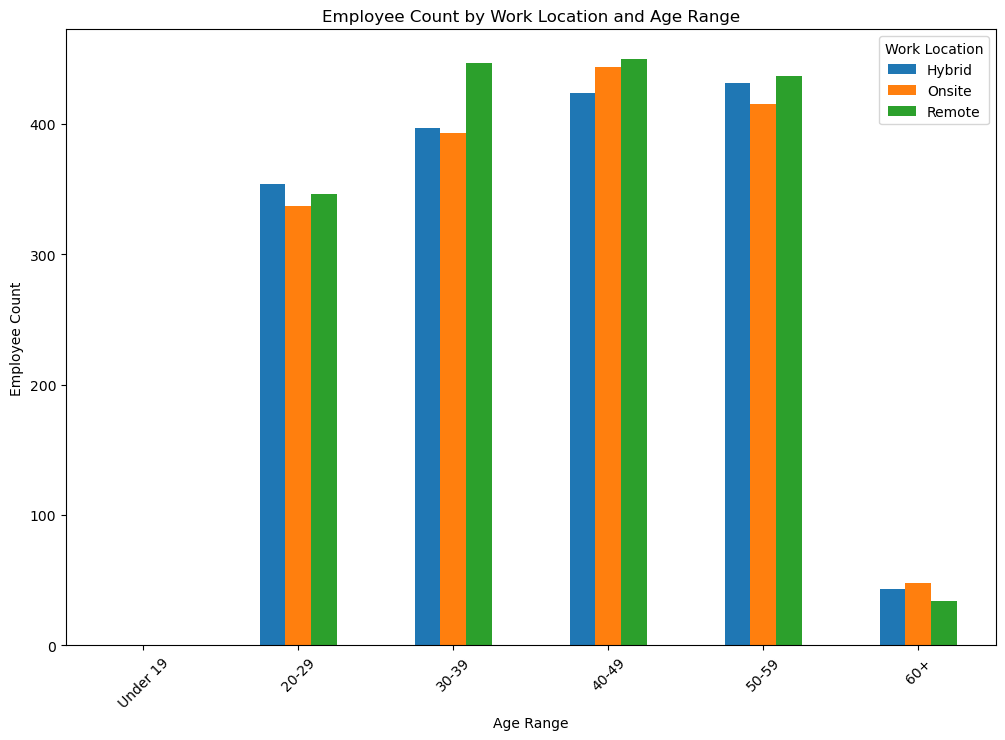

In [12]:
# Group by Age_Range and Work_Location, and count the number of Employee_IDs in each group
age_location_counts = age_location_counts = df.groupby(['Age_Range', 'Work_Location'], observed=False)['Employee_ID'].count().reset_index()
age_location_counts.rename(columns={'Employee_ID': 'Employee_Count'}, inplace=True)

# Pivot for plotting
age_location_pivot = age_location_counts.pivot(index='Age_Range', columns='Work_Location', values='Employee_Count')

# Plot the data
age_location_pivot.plot(kind='bar', figsize=(12, 8))
plt.title('Employee Count by Work Location and Age Range')
plt.xlabel('Age Range')
plt.ylabel('Employee Count')
plt.xticks(rotation=45)
plt.legend(title='Work Location')
plt.show()